# Les packages

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import math
import pickle
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from scipy import spatial,stats

# Jeu de données "openfoodfacts" pour le projet

In [18]:
data= pd.read_csv("openfoodfacts.csv", sep='\t')
data.head()

C:\Users\quent\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (0,24,25,26,28,44,49,61) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,Vitória crackers,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000000031,http://world-en.openfoodfacts.org/product/0000...,isagoofy,1539464774,2018-10-13T21:06:14Z,1539464817,2018-10-13T21:06:57Z,Cacao,NaN,130 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,000000000003327986,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1574175736,2019-11-19T15:02:16Z,1574175737,2019-11-19T15:02:17Z,Filetes de pollo empanado,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0000000000100,http://world-en.openfoodfacts.org/product/0000...,del51,1444572561,2015-10-11T14:09:21Z,1444659212,2015-10-12T14:13:32Z,moutarde au moût de raisin,NaN,100g,...,NaN,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,00000000001111111111,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1560020173,2019-06-08T18:56:13Z,1560020173,2019-06-08T18:56:13Z,Sfiudwx,NaN,dgesc,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#  Nettoyage des données 

## Vue d'ensemble des données - Sélection des features

In [19]:
print('lignes: ',data.shape[0],'\n colonnes: ',data.shape[1])

lignes:  1383645 
 colonnes:  181


In [20]:
data.columns.tolist()

['code',
 'url',
 'creator',
 'created_t',
 'created_datetime',
 'last_modified_t',
 'last_modified_datetime',
 'product_name',
 'generic_name',
 'quantity',
 'packaging',
 'packaging_tags',
 'brands',
 'brands_tags',
 'categories',
 'categories_tags',
 'categories_en',
 'origins',
 'origins_tags',
 'manufacturing_places',
 'manufacturing_places_tags',
 'labels',
 'labels_tags',
 'labels_en',
 'emb_codes',
 'emb_codes_tags',
 'first_packaging_code_geo',
 'cities',
 'cities_tags',
 'purchase_places',
 'stores',
 'countries',
 'countries_tags',
 'countries_en',
 'ingredients_text',
 'allergens',
 'allergens_en',
 'traces',
 'traces_tags',
 'traces_en',
 'serving_size',
 'serving_quantity',
 'no_nutriments',
 'additives_n',
 'additives',
 'additives_tags',
 'additives_en',
 'ingredients_from_palm_oil_n',
 'ingredients_from_palm_oil',
 'ingredients_from_palm_oil_tags',
 'ingredients_that_may_be_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil',
 'ingredients_that_may_be_from_palm_

In [21]:
cols_100g = [x for x in data.columns if  '_100g' in x]

In [22]:
df = data.reindex(['nutriscore_score']+cols_100g,axis=1)
df.head(50)

,nutriscore_score,energy-kj_100g,energy-kcal_100g,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,NaN,NaN,1569.0,1569.0,NaN,7.0,3.08,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,18.0,936.0,NaN,936.0,NaN,8.2,2.20,NaN,NaN,NaN,...,NaN,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,88.0,88.0,NaN,0.0,0.00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,251.0,251.0,NaN,3.0,1.00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
# Récupération des colonnes avec moins de80% de NaN
cols = []
for i in range(len(df.columns)):
    temp =int(df[df.columns[i]].isnull().sum()/df.shape[0]*100)
    print(df.columns[i],' - ', temp, '% de cellules vides' )
    if temp < 80 : 
        cols.append(df.columns[i])    


nutriscore_score  -  58 % de cellules vides
energy-kj_100g  -  92 % de cellules vides
energy-kcal_100g  -  24 % de cellules vides
energy_100g  -  19 % de cellules vides
energy-from-fat_100g  -  99 % de cellules vides
fat_100g  -  19 % de cellules vides
saturated-fat_100g  -  23 % de cellules vides
-butyric-acid_100g  -  99 % de cellules vides
-caproic-acid_100g  -  100 % de cellules vides
-caprylic-acid_100g  -  99 % de cellules vides
-capric-acid_100g  -  99 % de cellules vides
-lauric-acid_100g  -  99 % de cellules vides
-myristic-acid_100g  -  99 % de cellules vides
-palmitic-acid_100g  -  99 % de cellules vides
-stearic-acid_100g  -  99 % de cellules vides
-arachidic-acid_100g  -  99 % de cellules vides
-behenic-acid_100g  -  99 % de cellules vides
-lignoceric-acid_100g  -  100 % de cellules vides
-cerotic-acid_100g  -  99 % de cellules vides
-montanic-acid_100g  -  99 % de cellules vides
-melissic-acid_100g  -  100 % de cellules vides
monounsaturated-fat_100g  -  96 % de cellules 

In [24]:
cols.remove('energy-kcal_100g')
cols.remove('nutrition-score-fr_100g')
cols

['nutriscore_score',
 'energy_100g',
 'fat_100g',
 'saturated-fat_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',
 'sodium_100g']

In [25]:
df = df.reindex(columns=cols)
df

,nutriscore_score,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g
0,NaN,1569.0,7.0,3.08,70.1,15.0,NaN,7.8,1.40,0.560000
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,18.0,936.0,8.2,2.20,29.0,22.0,0.0,5.1,4.60,1.811024
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1383640,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1383641,NaN,418.0,12.0,1.00,2.0,1.0,NaN,1.0,1.00,0.400000
1383642,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1383643,NaN,100.0,0.3,0.00,2.4,0.6,NaN,1.6,0.64,0.256000


In [26]:
df['nutriscore_score'].isnull().sum()

816317

In [27]:
df=df[df['nutriscore_score'].notnull()]
df.shape[0]

567328

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 567328 entries, 3 to 1383639
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   nutriscore_score    567328 non-null  float64
 1   energy_100g         565846 non-null  float64
 2   fat_100g            565805 non-null  float64
 3   saturated-fat_100g  565790 non-null  float64
 4   carbohydrates_100g  565544 non-null  float64
 5   sugars_100g         565796 non-null  float64
 6   fiber_100g          353943 non-null  float64
 7   proteins_100g       565808 non-null  float64
 8   salt_100g           566208 non-null  float64
 9   sodium_100g         566207 non-null  float64
dtypes: float64(10)
memory usage: 47.6 MB


##  Train - Test divisé en deux CSV

# Nettoyage

## Outliers for 100g features (<0g & >100g)

In [29]:
# Split Train(70%) & Test(30%) to keep an "unknown" dataset from our model ## 80-20 to test* 
train.shape[0]

397129

In [31]:
indicators = cols[2:]
indicators

['fat_100g',
 'saturated-fat_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',
 'sodium_100g']

Text(0.5, 1.0, 'Distribution de sugars_100g avant cleaning')

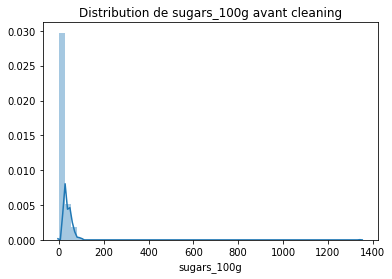

In [39]:
sns.distplot(df['sugars_100g'])
plt.title('Distribution de sugars_100g avant cleaning')

In [33]:
# For loop to set as NaN the values >100g or <0g

changes = 0
for i in range(train.shape[0]):
    for j in range(2,len(train.columns)):
        if not np.isnan(train.iat[i,j]):
            if ((train.iat[i,j]<0)|(train.iat[i,j]>100)):
                train.iat[i,j] = np.nan
                changes +=1
changes    

326

In [34]:
train['sugars_100g'].describe()

count    396032.000000
mean         13.388050
std          18.649396
min           0.000000
25%           0.880000
50%           4.100000
75%          20.000000
max         100.000000
Name: sugars_100g, dtype: float64

Text(0.5, 1.0, 'Distribution de sugars_100g après cleaning')

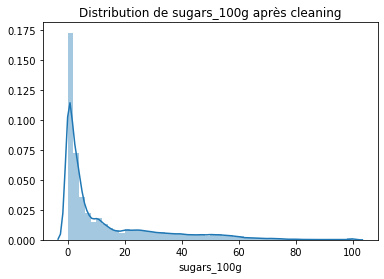

In [38]:
sns.distplot(train['sugars_100g'])
plt.title('Distribution de sugars_100g après cleaning')

In [50]:
for i in range(2,len(train.columns)):
    print(cols[i],':\n',train[cols[i]].describe(),'\n-------------\n\n')

fat_100g :
 count    396027.000000
mean         14.316041
std          17.503555
min           0.000000
25%           1.040000
50%           8.000000
75%          22.670000
max         100.000000
Name: fat_100g, dtype: float64 
-------------


saturated-fat_100g :
 count    396022.000000
mean          5.276473
std           7.822387
min           0.000000
25%           0.100000
50%           2.000000
75%           7.500000
max         100.000000
Name: saturated-fat_100g, dtype: float64 
-------------


carbohydrates_100g :
 count    395816.000000
mean         28.925462
std          27.493484
min           0.000000
25%           4.580000
50%          17.330000
75%          53.570000
max         100.000000
Name: carbohydrates_100g, dtype: float64 
-------------


sugars_100g :
 count    396009.000000
mean         13.393629
std          18.655099
min           0.000000
25%           0.900000
50%           4.100000
75%          20.000000
max         100.000000
Name: sugars_100g, dtype: flo

## Valeur aberrante pour la feature énergie_100g  ( méthod percentile)

Set as NaN the value of energy considered as outliers by a percentile method

In [40]:
train['energy_100g'].quantile([0.25,0.5,0.75,0.995])

0.250     456.0
0.500    1121.0
0.750    1700.0
0.995    3761.0
Name: energy_100g, dtype: float64

Text(0.5, 1.0, 'Boite à moustache energy_100g avant cleaning')

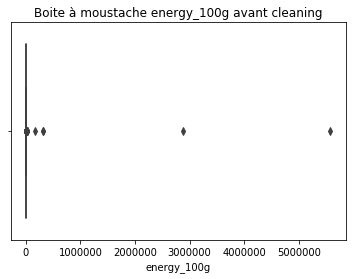

In [41]:
ax = sns.boxplot(x=train["energy_100g"])
plt.title('Boite à moustache energy_100g avant cleaning')# boxplot name to change

In [42]:
# chg_kj =0 
# for i in range(train.shape[0]):
#     if train.iat[i,1]>train['energy_100g'].quantile(0.995):
#         train.iat[i,1]=np.nan
#         chg_kj+=1
# chg_kj

train['energy_100g']= train['energy_100g'].where(train['energy_100g']<train['energy_100g'].quantile(0.995))


C:\Users\quent\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0.5, 1.0, 'Boite à moustache énergie après cleaning')

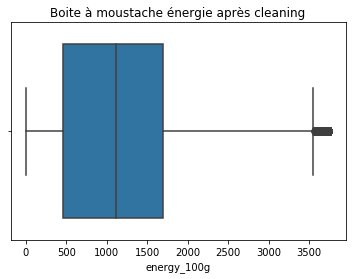

In [43]:
ax = sns.boxplot(x=train["energy_100g"])
plt.title('Boite à moustache énergie après cleaning')

##  Supprimer la ligne avec trop de NaN (ici> 2 NaN)

In [55]:
train['nan']= len(train.columns)-train.count(axis=1)

C:\Users\quent\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [56]:
train['nan'].describe()

count    397129.000000
mean          0.404088
std           0.649768
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           9.000000
Name: nan, dtype: float64

In [57]:
train=train[train['nan']<3]

In [60]:
train=train.drop(columns=['nan'])
train

,nutriscore_score,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g
193052,14.0,1494.0,28.57,14.29,0.00,0.00,0.0,25.00,1.160,0.4640
58219,-2.0,803.0,3.20,1.20,32.00,1.60,2.4,8.80,0.580,0.2320
660435,5.0,188.0,0.00,0.00,11.40,11.40,NaN,0.00,0.000,0.0000
966649,10.0,2201.0,31.00,2.80,53.00,2.30,3.9,6.90,1.500,0.6000
475588,10.0,1665.0,34.00,23.00,0.90,0.50,NaN,22.00,0.300,0.1200
...,...,...,...,...,...,...,...,...,...,...
1314508,16.0,2071.0,16.00,2.50,76.00,2.00,NaN,11.00,2.000,0.8000
46043,19.0,1686.0,13.43,4.48,65.67,44.78,1.5,2.99,0.560,0.2240
109695,27.0,2209.0,36.11,19.44,55.56,50.00,2.8,2.78,0.730,0.2920
1034094,26.0,2310.0,34.20,22.60,52.30,52.10,1.0,8.10,0.323,0.1292


## Scaler + KNN ( Utilisez KNN Imputer pour remplacer les valeurs NaN restantes dans le dataset)

In [61]:
scaler = StandardScaler().fit(train)
scaled_train= scaler.transform(train)

In [62]:
with open('scaler_1.pickle', 'wb') as file:
    pickle.dump(scaler, file)

In [63]:
imputer = KNNImputer(n_neighbors=5)

knn_train = imputer.fit_transform(scaled_train)

In [27]:
filled_data = scaler.inverse_transform(knn_train)

In [28]:
train_filled = pd.DataFrame(filled_data, columns=train.columns, index=train.index)

In [29]:
train_filled['nan']= len(train_filled.columns)-train_filled.count(axis=1)

train_filled.describe()

,nutriscore_score,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nan
count,396040.000000,396040.000000,396040.000000,396040.000000,3.960400e+05,396040.000000,396040.000000,396040.000000,396040.000000,396040.000000,396040.0
mean,9.228952,1164.765636,14.315035,5.282768,2.896160e+01,13.415548,2.739800,8.331063,1.125364,0.454585,0.0
std,8.917421,776.270305,17.492210,7.847453,2.749876e+01,18.663669,4.237370,8.698938,3.350645,1.479946,0.0
min,-15.000000,0.000000,-0.001907,-0.003688,3.552714e-15,0.000000,-0.000498,-0.012527,0.000000,0.000000,0.0
25%,2.000000,456.000000,1.040000,0.100000,4.600000e+00,0.900000,0.000000,2.000000,0.100000,0.040000,0.0
50%,10.000000,1121.000000,8.000000,2.000000,1.750000e+01,4.100000,1.400000,6.000000,0.610000,0.244000,0.0
75%,16.000000,1699.000000,22.730000,7.500000,5.357000e+01,20.000000,3.500000,12.000000,1.327500,0.531000,0.0
max,40.000000,3760.000000,100.000000,100.000000,1.000000e+02,100.000000,100.000000,100.000000,100.187038,100.000000,0.0


In [30]:
train_filled

,nutriscore_score,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nan
366282,3.0,548.0,3.49,0.58,20.35,6.40,1.700000,3.49,1.0625,0.425,0
556343,4.0,88.0,0.00,0.00,4.50,4.40,0.099472,0.10,0.0000,0.000,0
626503,21.0,1534.0,16.90,8.70,46.20,39.10,4.684100,6.60,0.2300,0.092,0
213350,-4.0,146.0,0.00,0.00,5.88,2.35,3.500000,2.35,0.0725,0.029,0
120694,-6.0,444.0,0.59,0.00,22.35,9.41,2.400000,3.53,0.0000,0.000,0
...,...,...,...,...,...,...,...,...,...,...,...
154017,6.0,201.0,2.00,0.00,7.20,0.80,0.000000,0.80,1.5050,0.602,0
641093,-4.0,364.0,2.60,0.40,11.00,10.00,2.100000,9.80,0.0800,0.032,0
48062,-3.0,448.0,1.79,0.00,0.89,0.00,0.000000,20.54,0.3800,0.152,0
211822,-7.0,209.0,0.00,0.00,11.43,2.14,2.100000,0.00,0.0000,0.000,0


In [64]:
with open('knn_imputer.pickle', 'wb') as file:
    pickle.dump(imputer, file)
    
print(imputer.n_features_in_,'features KNN')

10 features KNN


In [32]:
# train_filled.to_csv (r'~\Projet_3\train_filled.csv', index = False, header=True)

In [34]:
test['energy_100g'].count()

169722

## Drop Sum > 100g (Supprimer les lignes avec une somme supérieure à 100 g « macro-nourriture » )

In [59]:
filled= pd.read_csv("train_filled.csv")

In [60]:
filled

,nutriscore_score,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nan
0,13.0,1071.0,1.776357e-15,0.00,61.54,58.97,0.00,0.00,0.0000,0.000,0
1,19.0,1393.0,2.667000e+01,16.67,3.33,0.00,0.00,23.33,2.5000,1.000,0
2,24.0,1916.0,2.083000e+01,12.50,70.83,37.50,4.20,4.17,1.3025,0.521,0
3,21.0,1690.0,1.260000e+01,6.60,67.10,46.90,1.88,3.30,0.1300,0.052,0
4,8.0,431.0,7.800000e+00,3.90,4.20,1.20,0.78,4.10,1.4000,0.560,0
...,...,...,...,...,...,...,...,...,...,...,...
395963,23.0,2205.0,3.700000e+01,16.00,38.00,35.00,2.17,10.00,0.0500,0.020,0
395964,0.0,4.0,1.000000e-01,0.10,0.10,0.10,0.00,0.10,0.0100,0.004,0
395965,18.0,2389.0,4.286000e+01,8.93,25.00,3.57,10.70,25.00,1.8750,0.750,0
395966,15.0,2243.0,3.214000e+01,3.57,57.14,3.57,3.60,7.14,2.2325,0.893,0


In [61]:
filled=filled.drop(columns='nan')
filled.head(50)

,nutriscore_score,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g
0,13.0,1071.0,1.776357e-15,0.00,61.54,58.97,0.00000,0.00,0.0000,0.000
1,19.0,1393.0,2.667000e+01,16.67,3.33,0.00,0.00000,23.33,2.5000,1.000
2,24.0,1916.0,2.083000e+01,12.50,70.83,37.50,4.20000,4.17,1.3025,0.521
3,21.0,1690.0,1.260000e+01,6.60,67.10,46.90,1.88000,3.30,0.1300,0.052
4,8.0,431.0,7.800000e+00,3.90,4.20,1.20,0.78000,4.10,1.4000,0.560
5,-4.0,247.0,2.800000e+00,1.90,1.80,0.70,1.40000,2.70,0.6700,0.268
6,3.0,2720.0,5.500000e+01,10.00,17.50,5.00,5.00000,25.00,0.0000,0.000
7,2.0,1088.0,3.000000e+00,0.00,48.00,6.00,2.00000,10.00,1.3000,0.520
8,2.0,318.0,1.600000e+00,1.10,11.80,11.60,0.26000,3.20,0.1200,0.048
9,3.0,1176.0,1.600000e+01,4.10,18.00,0.60,2.10000,16.00,0.7000,0.280


In [63]:
filled['sum_100g']=filled['fat_100g']+filled['carbohydrates_100g']+filled['fiber_100g']+filled['proteins_100g']+filled['salt_100g']
filled.head()

,nutriscore_score,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,sum_100g
0,13.0,1071.0,1.776357e-15,0.00,61.54,58.97,0.00,0.00,0.0000,0.000,61.5400
1,19.0,1393.0,2.667000e+01,16.67,3.33,0.00,0.00,23.33,2.5000,1.000,55.8300
2,24.0,1916.0,2.083000e+01,12.50,70.83,37.50,4.20,4.17,1.3025,0.521,101.3325
3,21.0,1690.0,1.260000e+01,6.60,67.10,46.90,1.88,3.30,0.1300,0.052,85.0100
4,8.0,431.0,7.800000e+00,3.90,4.20,1.20,0.78,4.10,1.4000,0.560,18.2800


In [64]:
filled['sum_100g'].describe()

count    3.959680e+05
mean     5.536999e+01
std      3.354808e+01
min      1.776357e-15
25%      2.472000e+01
50%      5.207000e+01
75%      9.036000e+01
max      4.238700e+02
Name: sum_100g, dtype: float64

In [65]:
filled= filled.loc[filled['sum_100g']<=100]

Text(0.5, 1.0, 'Distribution Sugars_100g after multivariate cleaning')

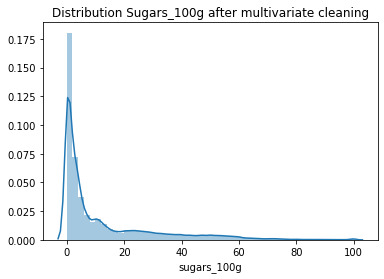

In [66]:
sns.distplot(filled['sugars_100g'])
plt.title('Distribution Sucres_100g après nettoyage multivarié')

In [67]:
filled= filled.drop(columns='sum_100g')

In [68]:
filled

,nutriscore_score,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g
0,13.0,1071.0,1.776357e-15,0.00,61.54,58.97,0.00,0.00,0.0000,0.000
1,19.0,1393.0,2.667000e+01,16.67,3.33,0.00,0.00,23.33,2.5000,1.000
3,21.0,1690.0,1.260000e+01,6.60,67.10,46.90,1.88,3.30,0.1300,0.052
4,8.0,431.0,7.800000e+00,3.90,4.20,1.20,0.78,4.10,1.4000,0.560
5,-4.0,247.0,2.800000e+00,1.90,1.80,0.70,1.40,2.70,0.6700,0.268
...,...,...,...,...,...,...,...,...,...,...
395960,11.0,1891.0,1.667000e+01,2.38,69.05,26.19,4.80,7.14,1.0125,0.405
395961,19.0,1611.0,1.410000e+01,5.77,58.97,44.87,2.60,3.85,0.7700,0.308
395963,23.0,2205.0,3.700000e+01,16.00,38.00,35.00,2.17,10.00,0.0500,0.020
395964,0.0,4.0,1.000000e-01,0.10,0.10,0.10,0.00,0.10,0.0100,0.004


## KDTree est utiliser pour repérer les valeurs aberrantes multivariées 

In [69]:
test_kdtree=filled.copy()

In [72]:
scaler = StandardScaler().fit(test_kdtree)
scaled_data= scaler.transform(test_kdtree)
scaled_tree = spatial.KDTree(scaled_data)
neighbours_scaled = scaled_tree.query(scaled_data,k=6)
dist_scaled = pd.DataFrame(neighbours_scaled[0])
dist_scaled = dist_scaled.drop(columns=0)
dist_scaled['mean']=dist_scaled.mean(axis=1)
dist_scaled['mean'].describe()

count    366604.000000
mean          0.162477
std           0.186119
min           0.000000
25%           0.033777
50%           0.122849
75%           0.227415
max          15.743599
Name: mean, dtype: float64

Text(0.5, 1.0, 'Boxplot de la distance moyenne aux 5 KNN avant gestion des outliers')

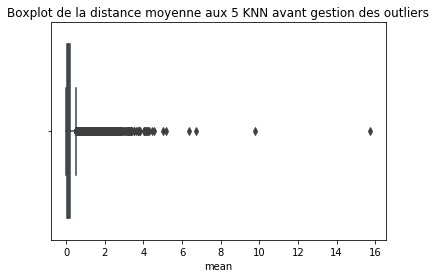

In [74]:
sns.boxplot(dist_scaled['mean'])
plt.title('Boxplot de la distance moyenne aux 5 KNN avant gestion des outliers')

In [77]:
dist_scaled['mean'].quantile(0.99)

0.8401970229076423

In [16]:
dist_scaled.shape[0]-dist_scaled[dist_scaled['mean']<dist_scaled['mean'].quantile(0.99)].count()

1       3667
2       3667
3       3667
4       3667
5       3667
mean    3667
dtype: int64

In [80]:
filled['mean']=dist_scaled['mean'].values
filled

,nutriscore_score,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,mean
0,13.0,1071.0,1.776357e-15,0.00,61.54,58.97,0.00,0.00,0.0000,0.000,0.080229
1,19.0,1393.0,2.667000e+01,16.67,3.33,0.00,0.00,23.33,2.5000,1.000,0.133918
3,21.0,1690.0,1.260000e+01,6.60,67.10,46.90,1.88,3.30,0.1300,0.052,0.204348
4,8.0,431.0,7.800000e+00,3.90,4.20,1.20,0.78,4.10,1.4000,0.560,0.226564
5,-4.0,247.0,2.800000e+00,1.90,1.80,0.70,1.40,2.70,0.6700,0.268,0.164252
...,...,...,...,...,...,...,...,...,...,...,...
395960,11.0,1891.0,1.667000e+01,2.38,69.05,26.19,4.80,7.14,1.0125,0.405,0.005526
395961,19.0,1611.0,1.410000e+01,5.77,58.97,44.87,2.60,3.85,0.7700,0.308,0.236280
395963,23.0,2205.0,3.700000e+01,16.00,38.00,35.00,2.17,10.00,0.0500,0.020,0.263687
395964,0.0,4.0,1.000000e-01,0.10,0.10,0.10,0.00,0.10,0.0100,0.004,0.011645


Text(0.5, 1.0, 'Boxplot de la distance moyenne aux 5 KNN après gestion des outliers')

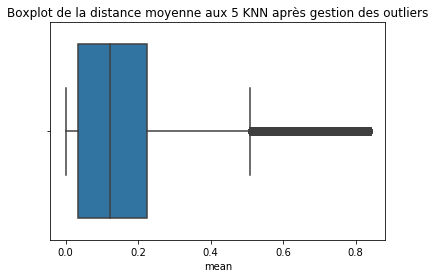

In [82]:
sns.boxplot(dist_scaled['mean'][dist_scaled['mean']<dist_scaled['mean'].quantile(0.99)])
plt.title('Boxplot de la distance moyenne aux 5 KNN après gestion des outliers')

In [79]:
dist_scaled['mean'][dist_scaled['mean']<dist_scaled['mean'].quantile(0.99)]

0         0.080229
1         0.133918
2         0.204348
3         0.226564
4         0.164252
            ...   
366599    0.005526
366600    0.236280
366601    0.263687
366602    0.011645
366603    0.204090
Name: mean, Length: 362937, dtype: float64

In [82]:
filled= filled.loc[filled['mean']<filled['mean'].quantile(0.99)]
filled

,nutriscore_score,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,mean
0,13.0,1071.0,1.776357e-15,0.00,61.54,58.97,0.00,0.00,0.0000,0.000,0.080229
1,19.0,1393.0,2.667000e+01,16.67,3.33,0.00,0.00,23.33,2.5000,1.000,0.133918
3,21.0,1690.0,1.260000e+01,6.60,67.10,46.90,1.88,3.30,0.1300,0.052,0.204348
4,8.0,431.0,7.800000e+00,3.90,4.20,1.20,0.78,4.10,1.4000,0.560,0.226564
5,-4.0,247.0,2.800000e+00,1.90,1.80,0.70,1.40,2.70,0.6700,0.268,0.164252
...,...,...,...,...,...,...,...,...,...,...,...
395960,11.0,1891.0,1.667000e+01,2.38,69.05,26.19,4.80,7.14,1.0125,0.405,0.005526
395961,19.0,1611.0,1.410000e+01,5.77,58.97,44.87,2.60,3.85,0.7700,0.308,0.236280
395963,23.0,2205.0,3.700000e+01,16.00,38.00,35.00,2.17,10.00,0.0500,0.020,0.263687
395964,0.0,4.0,1.000000e-01,0.10,0.10,0.10,0.00,0.10,0.0100,0.004,0.011645


In [87]:
filled.to_csv (r'~Projet_3\train.csv', index = False, header=True)
test.to_csv (r'~Projet_3\test.csv', index = False, header=True)